In [2]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-07 10:14:23--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 4.237.22.38
Connecting to github.com (github.com)|4.237.22.38|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-07 10:14:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv’

jamb_exam_results.c 100%[===================>] 382.33K  2.16MB/s    in 0.2s    

2024-11-07 10:14:24 (2.16 MB/s) - ‘jamb_exam_results.

In [3]:
!head jamb_exam_results.csv

JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
202,25,85,2,13.6,Public,Urban,Yes,No,Medium,Low,6,15,Male,Low,Tertiary,1
251,35,85,4,2.6,Public,Urban,No,Yes,Low,Medium,7,16,Female,Medium,Primary,4
129,27,75,3,9.4,Public,Urban,No,Yes,Low,Medium,8,19,Female,Low,Tertiary,3
220,23,85,3,4.6,Public,Rural,No,No,Low,Medium,9,19,Female,Medium,Tertiary,1


In [74]:
# Imports

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import roc_auc_score, mean_absolute_error, root_mean_squared_error

from sklearn.ensemble import RandomForestRegressor


In [9]:
### Read data & Prepare dataset

In [10]:

df = pd.read_csv("jamb_exam_results.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [11]:
del df['student_id']

In [12]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [13]:
df.isna().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [15]:
df = df.fillna(0)
df.isna().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [19]:
# Train, validate split

df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=1)

len(df_full_train), len(df_train), len(df_val), len(df_test)

(4000, 3000, 1000, 1000)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [22]:
y_train[:5]

array([145, 231, 161, 146, 283])

In [23]:
df_train.head()

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,Public,Urban,No,Yes,Medium,Low,21,Female,Low,0,3
1,11,80,2,3.3,Public,Urban,Yes,Yes,Medium,High,22,Female,Medium,Secondary,1
2,31,82,1,8.3,Public,Urban,Yes,Yes,Low,High,19,Female,High,Tertiary,2
3,29,79,1,15.8,Public,Rural,Yes,Yes,Low,Low,19,Male,Low,Primary,2
4,28,96,2,8.9,Private,Rural,Yes,Yes,Medium,Low,19,Male,High,Secondary,3


In [26]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)



In [28]:
dv.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [27]:
# Q1

In [34]:
dtr = DecisionTreeRegressor(
    max_depth=1,
    random_state=1
)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [36]:
export_text(dtr, feature_names=dv.get_feature_names_out())

'|--- study_hours_per_week <= 18.50\n|   |--- value: [155.24]\n|--- study_hours_per_week >  18.50\n|   |--- value: [188.59]\n'

```
study_hours_per_week
```


In [46]:

train_pred = dtr.predict(X_train)
tr_mae = mean_absolute_error(y_train, train_pred)

y_pred = dtr.predict(X_val)
val_mae = mean_absolute_error(y_val, y_pred)

tr_mae, val_mae

(np.float64(35.81064463380674), np.float64(37.20086105263158))

In [47]:
# Q2

In [50]:
rfr = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [55]:
y_pred = rfr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

np.float64(42.13724207871227)

In [56]:
cvrmse = (rmse / y_train.mean()) * 100
cvrmse

np.float64(24.391706476928785)

``` 
RMSE : 42.137
```

In [53]:
# Q3

In [65]:
nes = list(range(10, 201, 10))
nes

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [75]:
rmse_scores = []
for n in nes:
    rfr = RandomForestRegressor(
        n_estimators=n,
        random_state=1,
        n_jobs=-1
    )
    rfr.fit(X_train, y_train)

    y_pred = rfr.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_scores.append((n, np.round(rmse, 3)))
    


In [78]:
score_df = pd.DataFrame(rmse_scores, columns=['n', 'score'])
score_df

,n,score
0,10,42.137
1,20,41.461
2,30,41.106
3,40,40.917
4,50,40.852
5,60,40.784
6,70,40.677
7,80,40.539
8,90,40.504
9,100,40.517


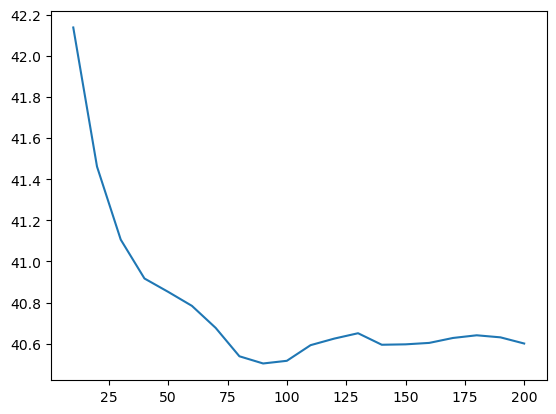

In [79]:
plt.plot(score_df.n, score_df.score)

```

n = 80

```


In [84]:
mds = [10, 15, 20, 25]
nes = list(range(10, 201, 10))

mean_rmses = []
for m in mds:
    rmses = []
    for n in nes:
        rfr = RandomForestRegressor(
            n_estimators=n,
            max_depth=m,
            random_state=1,
            n_jobs=-1
        )
        rfr.fit(X_train, y_train)
    
        y_pred = rfr.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        rmses.append(rmse)
    mean_rmses.append((m, np.mean(rmses)))
    

In [85]:
mean_rmses

[(10, np.float64(40.39249798892396)),
 (15, np.float64(40.73528172486332)),
 (20, np.float64(40.739734321829275)),
 (25, np.float64(40.78786565962805))]

In [86]:
# Best max_depth = 10

In [87]:
# Q5:


In [88]:
rfr = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [90]:
len(rfr.feature_importances_)

29

In [95]:
len(dv.get_feature_names_out())

29

In [98]:
fi = list(zip(dv.get_feature_names_out(), rfr.feature_importances_))
fi

[('access_to_learning_materials=No', np.float64(0.012325395818561702)),
 ('access_to_learning_materials=Yes', np.float64(0.010261891957053597)),
 ('age', np.float64(0.06931145469695398)),
 ('assignments_completed', np.float64(0.03151678945460071)),
 ('attendance_rate', np.float64(0.1497290297846747)),
 ('distance_to_school', np.float64(0.1364858048632369)),
 ('extra_tutorials=No', np.float64(0.013459336291731934)),
 ('extra_tutorials=Yes', np.float64(0.009131355726749437)),
 ('gender=Female', np.float64(0.009288710588929935)),
 ('gender=Male', np.float64(0.010382634572648446)),
 ('it_knowledge=High', np.float64(0.0177193420394119)),
 ('it_knowledge=Low', np.float64(0.012404050525957137)),
 ('it_knowledge=Medium', np.float64(0.009141479881545294)),
 ('parent_education_level', np.float64(0.0)),
 ('parent_education_level=Primary', np.float64(0.01545036018792814)),
 ('parent_education_level=Secondary', np.float64(0.016956919815100068)),
 ('parent_education_level=Tertiary', np.float64(0.014

In [102]:
fea_im_df = pd.DataFrame(fi, columns=['feature', 'importance'])
fea_im_df.sort_values(by='importance', ascending=False)

,feature,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


In [103]:
# Q6

In [104]:
!pip install xgboost

In [105]:
import xgboost as xgb

In [106]:
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [108]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity':1
}

In [110]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)
model

In [111]:
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

np.float64(44.432098039002526)

In [112]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity':1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100)
model
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

np.float64(41.043354592351655)

```
0.1 ETA gives a better result.
```